# **APPROACH FOR TAXI FARE PREDICTION      **
      1.import all the libraries
      2.Load and audit the data
      3.Data preparation and data Transformation
            
            1.Missing values: impute all missing values using mean,median,model.
            2.Inconsistent values: Replace all inconsistance with consistance values.
            3.Outliers:Transform
      4.Data visualization
      5.Data analysis
            1.Uni-variate Analysis(mean,median,mode,skewness)
            2.Bi-variate Analysis(Correlation,Covariance,Chi_square test)
            3.Multi-variate Analysis
                1.Regression:Nota regression problem
                2.ClassificatiponSince outcome varaiable is yes or not.
                3.Apply all algorthms.


# **IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/TaxiFare.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
df.shape

(50000, 8)

In [6]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<ipython-input-11-9480ac08d4a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

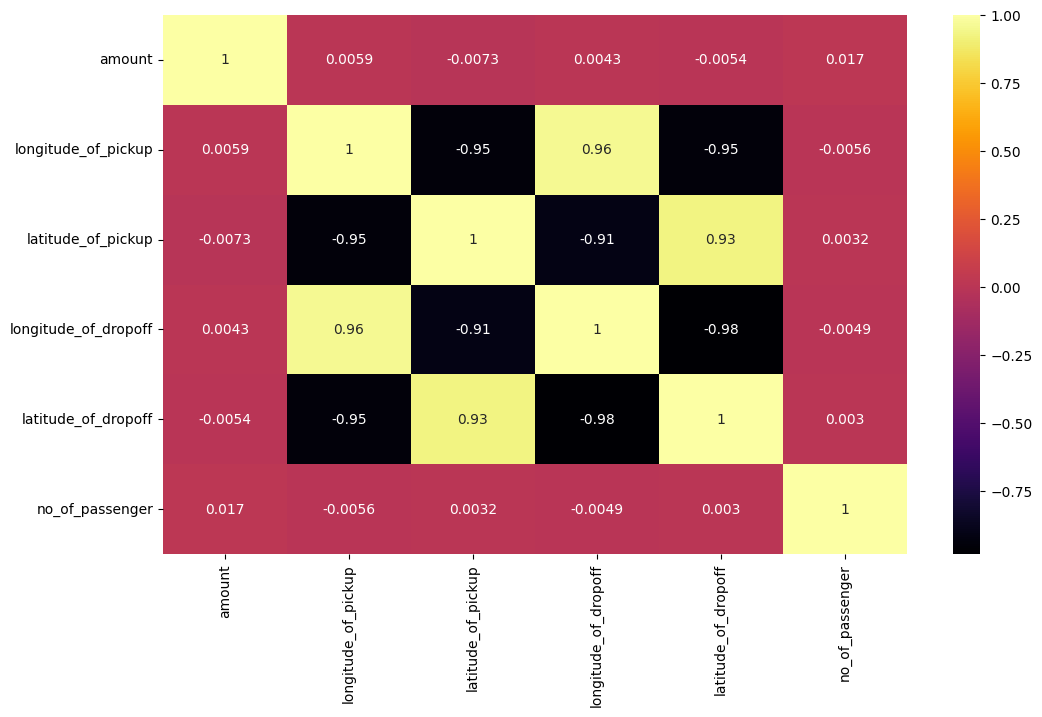

In [11]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='inferno')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [13]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        label=LabelEncoder()
        df[i]=label.fit_transform(df[i])

# **DETECTING OUTLIERS**

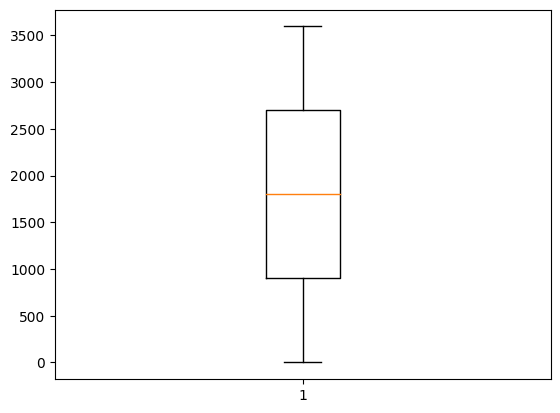

0        1579
1        3133
2        2097
3        1839
4        3057
         ... 
49995    1513
49996    1157
49997    3177
49998     540
49999     794
Name: unique_id, Length: 50000, dtype: int64


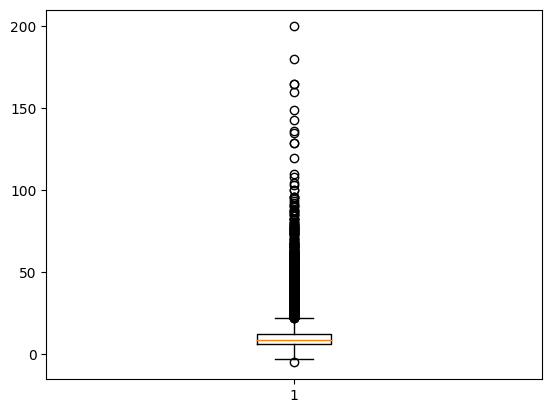

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64


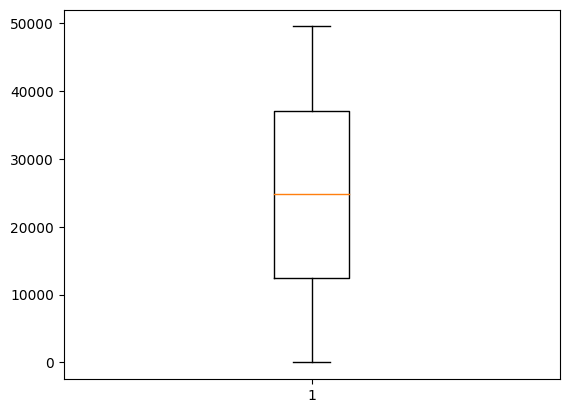

0         3408
1         7748
2        20152
3        25488
4         8973
         ...  
49995    34451
49996    49424
49997    15821
49998    29672
49999     7927
Name: date_time_of_pickup, Length: 50000, dtype: int64


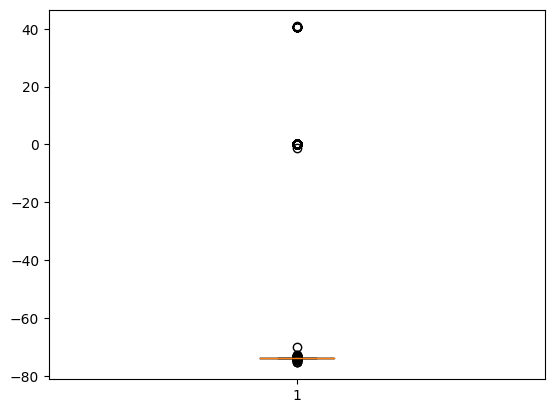

0       -73.844311
1       -74.016048
2       -73.982738
3       -73.987130
4       -73.968095
           ...    
49995   -73.999973
49996   -73.984756
49997   -74.002698
49998   -73.946062
49999   -73.932603
Name: longitude_of_pickup, Length: 50000, dtype: float64


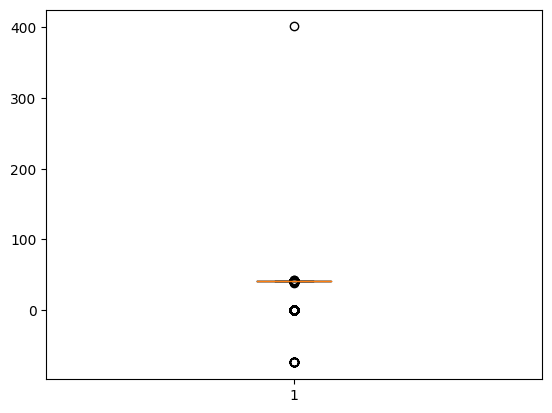

0        40.721319
1        40.711303
2        40.761270
3        40.733143
4        40.768008
           ...    
49995    40.748531
49996    40.768211
49997    40.739428
49998    40.777567
49999    40.763805
Name: latitude_of_pickup, Length: 50000, dtype: float64


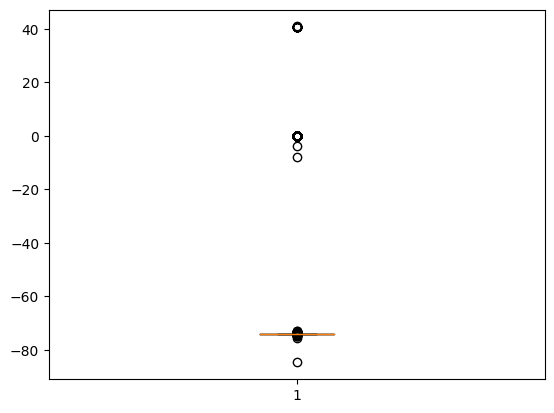

0       -73.841610
1       -73.979268
2       -73.991242
3       -73.991567
4       -73.956655
           ...    
49995   -74.016899
49996   -73.987366
49997   -73.998108
49998   -73.953450
49999   -73.932603
Name: longitude_of_dropoff, Length: 50000, dtype: float64


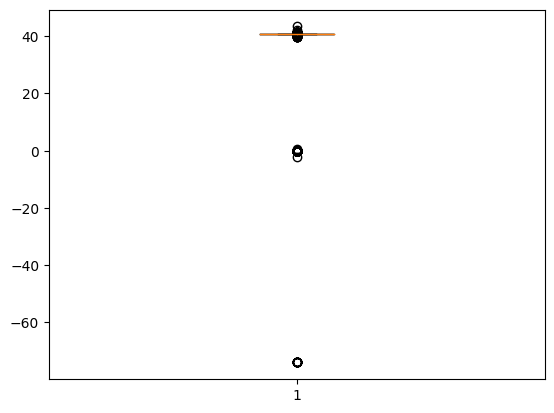

0        40.712278
1        40.782004
2        40.750562
3        40.758092
4        40.783762
           ...    
49995    40.705993
49996    40.760597
49997    40.759483
49998    40.779687
49999    40.763805
Name: latitude_of_dropoff, Length: 50000, dtype: float64


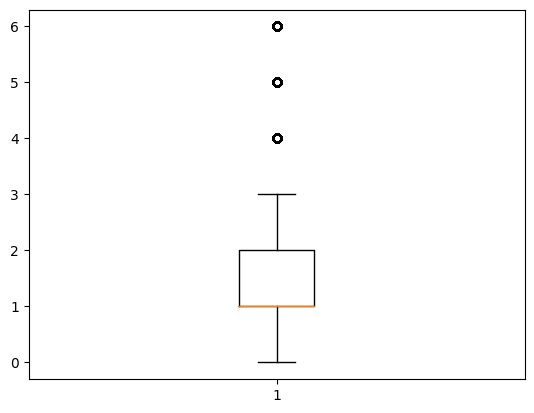

0        1
1        1
2        2
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    2
49999    1
Name: no_of_passenger, Length: 50000, dtype: int64


In [14]:
import matplotlib.pyplot as plt
for i in df:
    plt.boxplot(df[i])
    plt.show()
    print(df[i])


# **TREATING OUTLIERS**

lowerbound: -1795.5
upperbound: 5392.5
0        1579
1        3133
2        2097
3        1839
4        3057
         ... 
49995    1513
49996    1157
49997    3177
49998     540
49999     794
Name: unique_id, Length: 50000, dtype: int64


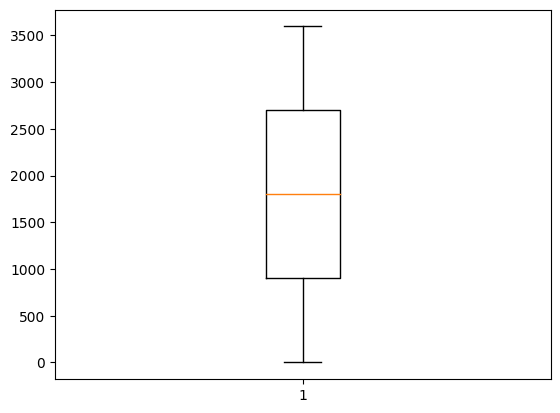

lowerbound: -3.75
upperbound: 22.25
0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64


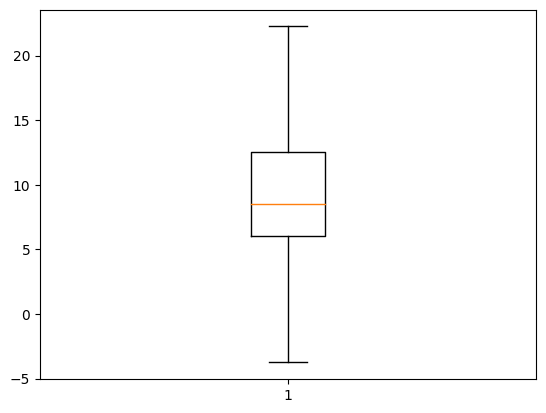

lowerbound: -24744.5
upperbound: 74277.5
0         3408
1         7748
2        20152
3        25488
4         8973
         ...  
49995    34451
49996    49424
49997    15821
49998    29672
49999     7927
Name: date_time_of_pickup, Length: 50000, dtype: int64


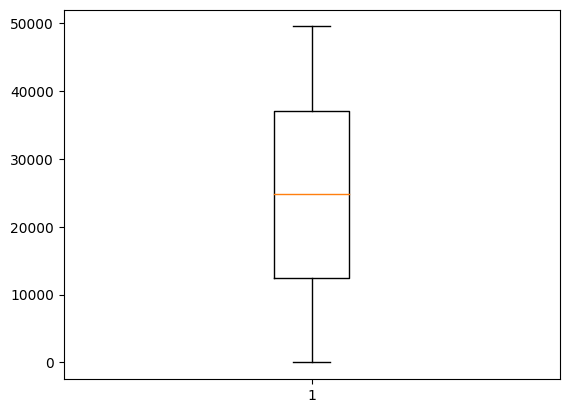

lowerbound: -74.029433
upperbound: -73.92977700000002
0       -73.844311
1       -74.016048
2       -73.982738
3       -73.987130
4       -73.968095
           ...    
49995   -73.999973
49996   -73.984756
49997   -74.002698
49998   -73.946062
49999   -73.932603
Name: longitude_of_pickup, Length: 50000, dtype: float64


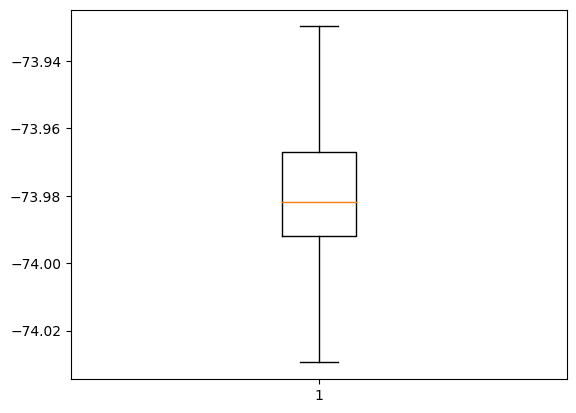

lowerbound: 40.68615925
upperbound: 40.816081249999996
0        40.721319
1        40.711303
2        40.761270
3        40.733143
4        40.768008
           ...    
49995    40.748531
49996    40.768211
49997    40.739428
49998    40.777567
49999    40.763805
Name: latitude_of_pickup, Length: 50000, dtype: float64


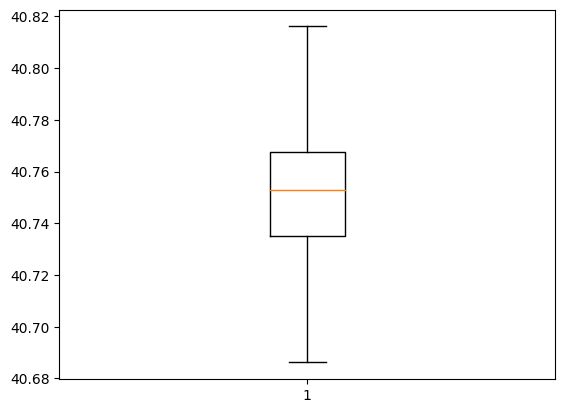

lowerbound: -74.032504375
upperbound: -73.922231375
0       -73.841610
1       -73.979268
2       -73.991242
3       -73.991567
4       -73.956655
           ...    
49995   -74.016899
49996   -73.987366
49997   -73.998108
49998   -73.953450
49999   -73.932603
Name: longitude_of_dropoff, Length: 50000, dtype: float64


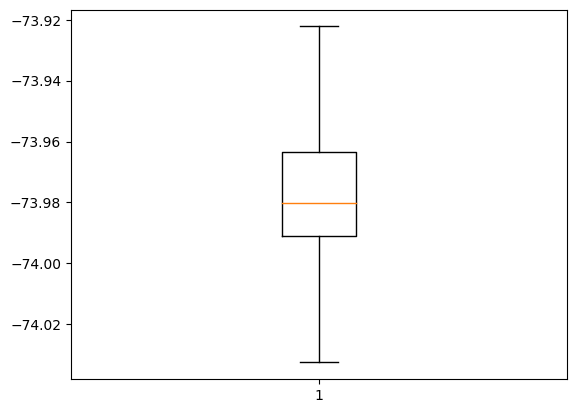

lowerbound: 40.68367825000001
upperbound: 40.81886024999999
0        40.712278
1        40.782004
2        40.750562
3        40.758092
4        40.783762
           ...    
49995    40.705993
49996    40.760597
49997    40.759483
49998    40.779687
49999    40.763805
Name: latitude_of_dropoff, Length: 50000, dtype: float64


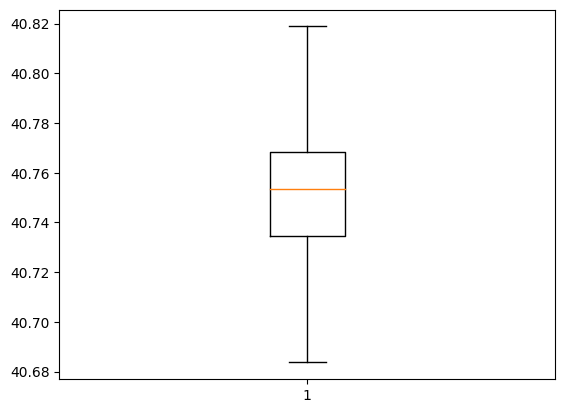

lowerbound: -0.5
upperbound: 3.5
0        1
1        1
2        2
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    2
49999    1
Name: no_of_passenger, Length: 50000, dtype: int64


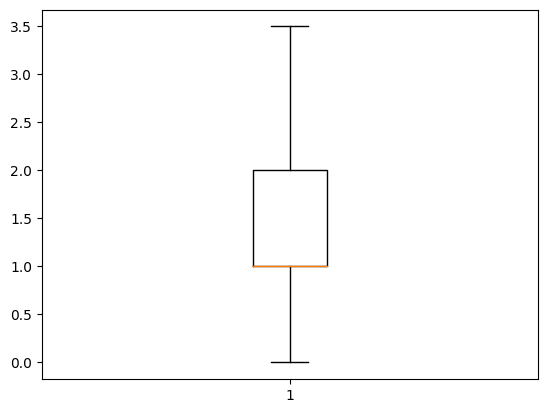

In [15]:
for i in df:
    minimum_value=df[i].min()
    maximum_value=df[i].max()
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_cutoff=q1-1.5*iqr
    print("lowerbound:",lower_cutoff)
    upper_cutoff=q3+1.5*iqr
    print("upperbound:",upper_cutoff)
    print(df[i])
    df[i].clip(upper=upper_cutoff,inplace=True)
    df[i].clip(lower=lower_cutoff,inplace=True)
    plt.boxplot(df[i])
    plt.show()


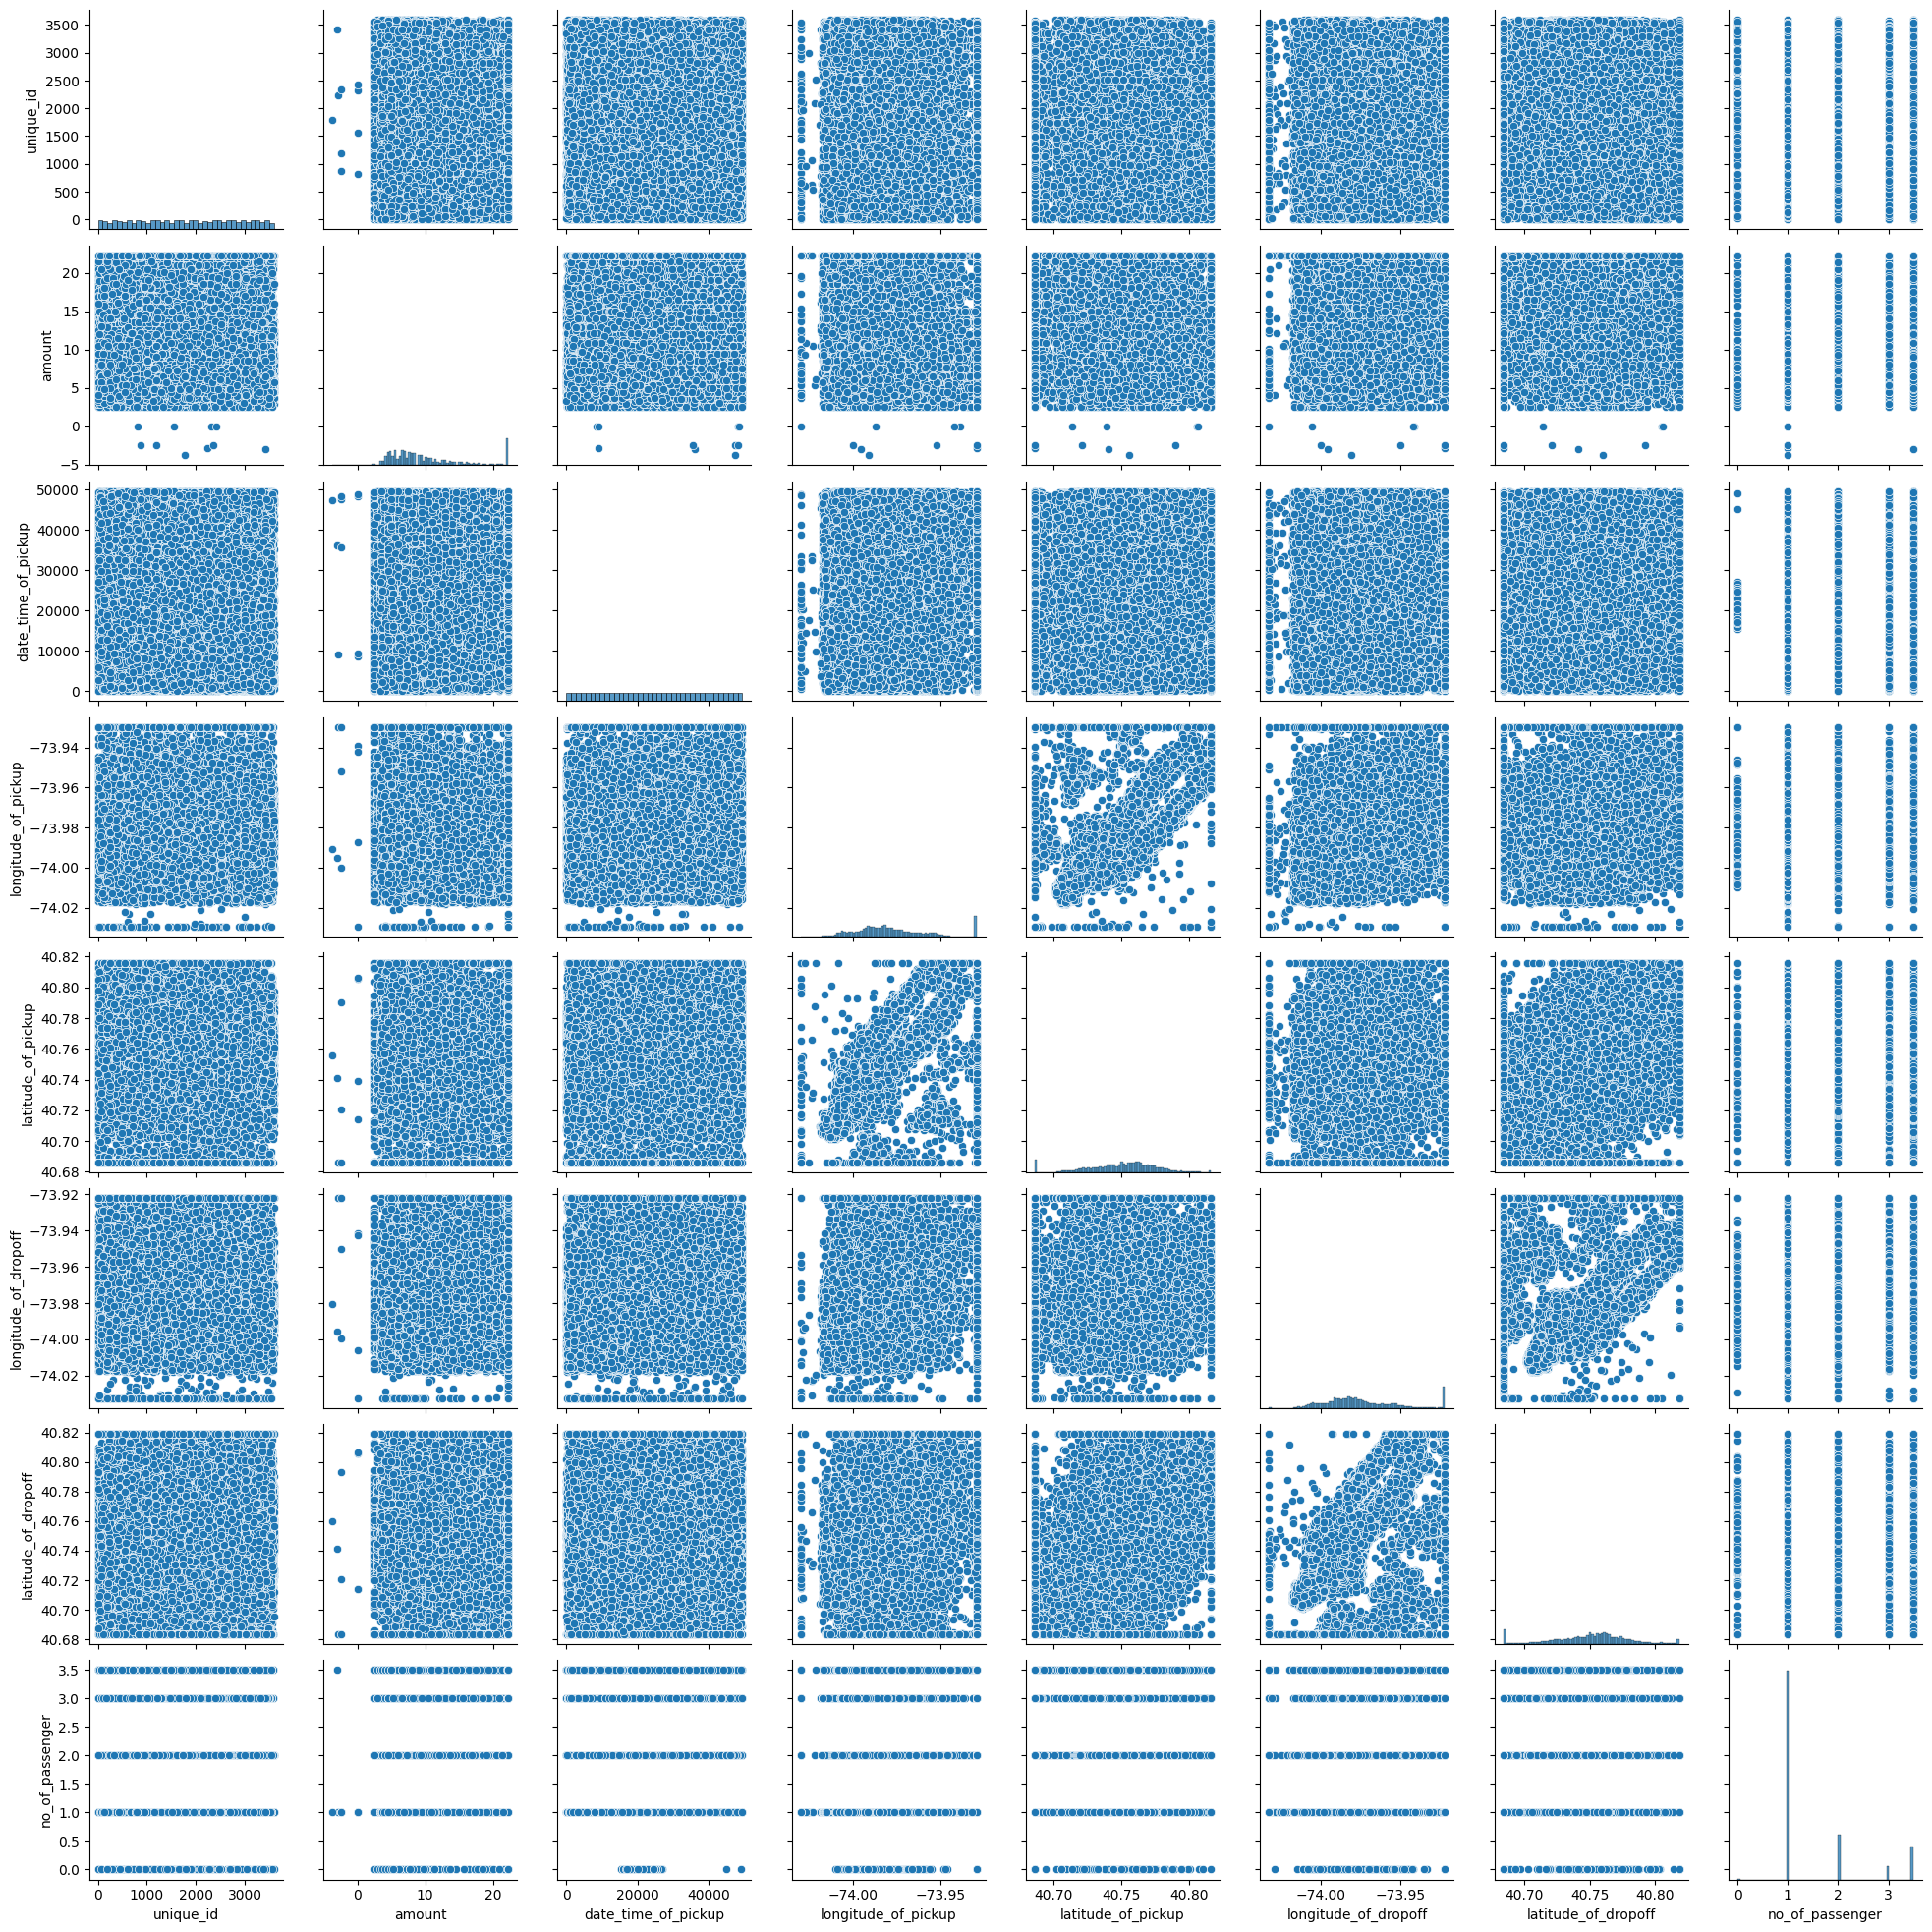

In [16]:
import seaborn as sns
sns.pairplot(df)
plt.show()

# **PREPROCESSING**

In [17]:
x=df.drop(["amount"],axis=1)
y=df.iloc[:,1]
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 7), (10000, 7), (40000,), (10000,))

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
x, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [20]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
y_pred

array([ 9.09859481,  9.09859481,  9.09859481, ..., 21.12733445,
        9.09859481,  9.09859481])

In [21]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',MAE)
print('Mean Squared Error:',MSE)
print('Root Mean Squared Error:',RMSE)

Mean Absolute Error: 3.6116987498351847
Mean Squared Error: 21.570097390626692
Root Mean Squared Error: 4.644361892728289


In [22]:
df = pd.DataFrame()
df['Metrics'] = ['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df['Values'] = [MAE,MSE,RMSE]
df

,Metrics,Values
0,Mean Absolute Error,3.611699
1,Mean Squared Error,21.570097
2,Root Mean Squared Error,4.644362


<BarContainer object of 3 artists>

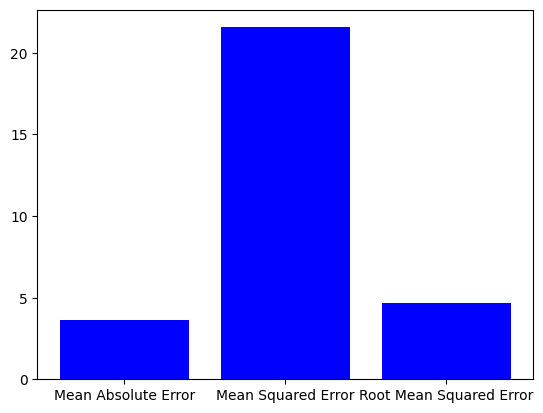

In [24]:
import matplotlib.pyplot as plt
plt.bar(x=df['Metrics'],height=df['Values'],color='BLUE')